In [1]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

In [17]:
# Ubicacion del archivo de datos
url = '/content/statsTitulos.csv' # external url?

In [18]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,C.,País,Mundial,Mundial Sub-20,Mundial Sub-17,Confederaciones,JJ. OO.[n 1],JJ. OO. de la Juventud,Total,Nota
0,0,CSF,Brasil,5,5,4,4,2,-,20,[n 2]
1,1,EUR,Alemania[n 3],4,1,1,1,-,-,7,[n 4]
2,2,EUR,Italia,4,-,-,-,1,-,5,[n 5]
3,3,CSF,Argentina,3,6,-,1,2,-,12,[n 6]
4,4,EUR,Francia,2,1,1,2,1,-,7,[n 7]


In [19]:
# Visualizamos el DataFrame
data

,Unnamed: 0,C.,País,Mundial,Mundial Sub-20,Mundial Sub-17,Confederaciones,JJ. OO.[n 1],JJ. OO. de la Juventud,Total,Nota
0,0,CSF,Brasil,5,5,4,4,2,-,20,[n 2]
1,1,EUR,Alemania[n 3],4,1,1,1,-,-,7,[n 4]
2,2,EUR,Italia,4,-,-,-,1,-,5,[n 5]
3,3,CSF,Argentina,3,6,-,1,2,-,12,[n 6]
4,4,EUR,Francia,2,1,1,2,1,-,7,[n 7]
5,5,CSF,Uruguay,2,1,-,-,2,-,5,[n 8]
6,6,EUR,Inglaterra,1,1,1,-,2,-,5,[n 9]
7,7,EUR,España,1,1,-,-,1,-,3,[n 10]
8,8,EUR,Serbia[n 11],-,2,-,-,1,-,3,[n 12]
9,9,EUR,Portugal,-,2,-,-,-,-,2,[n 13]


In [20]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,C.,País,Mundial,Mundial Sub-20,Mundial Sub-17,Confederaciones,JJ. OO.[n 1],JJ. OO. de la Juventud,Total,Nota
0,CSF,Brasil,5,5,4,4,2,-,20,[n 2]
1,EUR,Alemania[n 3],4,1,1,1,-,-,7,[n 4]
2,EUR,Italia,4,-,-,-,1,-,5,[n 5]
3,CSF,Argentina,3,6,-,1,2,-,12,[n 6]
4,EUR,Francia,2,1,1,2,1,-,7,[n 7]
5,CSF,Uruguay,2,1,-,-,2,-,5,[n 8]
6,EUR,Inglaterra,1,1,1,-,2,-,5,[n 9]
7,EUR,España,1,1,-,-,1,-,3,[n 10]
8,EUR,Serbia[n 11],-,2,-,-,1,-,3,[n 12]
9,EUR,Portugal,-,2,-,-,-,-,2,[n 13]


In [21]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   C.                      27 non-null     object
 1   País                    27 non-null     object
 2   Mundial                 27 non-null     object
 3   Mundial Sub-20          27 non-null     object
 4   Mundial Sub-17          27 non-null     object
 5   Confederaciones         27 non-null     object
 6   JJ. OO.[n 1]            27 non-null     object
 7   JJ. OO. de la Juventud  27 non-null     object
 8   Total                   27 non-null     int64 
 9   Nota                    27 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.2+ KB


In [22]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,Total
count,27.000000
mean,3.740741
std,4.202496
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [29]:
# Fix no value in Titulos col
def fixData(val):
    return 0 if val == '-' else int(val)

In [30]:
# Correccion de lo campos mal formateados
data['Mundial'] = data.apply(lambda x: fixData(x['Mundial']), axis=1) # Aplicamos la funcion fixData()
data['Mundial Sub-20'] = data.apply(lambda x: fixData(x['Mundial Sub-20']), axis=1) # Aplicamos la funcion fixData()
data['Mundial Sub-17'] = data.apply(lambda x: fixData(x['Mundial Sub-17']), axis=1) # Aplicamos la funcion fixData()
data['Confederaciones'] = data.apply(lambda x: fixData(x['Confederaciones']), axis=1) # Aplicamos la funcion fixData()
data['JJ. OO.[n 1]'] = data.apply(lambda x: fixData(x['JJ. OO.[n 1]']), axis=1) # Aplicamos la funcion fixData()
data['JJ. OO. de la Juventud'] = data.apply(lambda x: fixData(x['JJ. OO. de la Juventud']), axis=1) # Aplicamos la funcion fixData()



In [31]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   C.                      27 non-null     object
 1   País                    27 non-null     object
 2   Mundial                 27 non-null     int64 
 3   Mundial Sub-20          27 non-null     int64 
 4   Mundial Sub-17          27 non-null     int64 
 5   Confederaciones         27 non-null     int64 
 6   JJ. OO.[n 1]            27 non-null     int64 
 7   JJ. OO. de la Juventud  27 non-null     int64 
 8   Total                   27 non-null     int64 
 9   Nota                    27 non-null     object
dtypes: int64(7), object(3)
memory usage: 2.2+ KB


In [33]:
data[['C.','País', 'Mundial', 'Mundial Sub-20', 'Mundial Sub-17', 'Confederaciones', 'JJ. OO.[n 1]', 'JJ. OO. de la Juventud', 'Total', 'Nota']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


<ipython-input-33-32129378d900>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['C.','País', 'Mundial', 'Mundial Sub-20', 'Mundial Sub-17', 'Confederaciones', 'JJ. OO.[n 1]', 'JJ. OO. de la Juventud', 'Total', 'Nota']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-33-32129378d900>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['C.','País', 'Mundial', 'Mundial Sub-20', 'Mundial Sub-17', 'Confederaciones', 'JJ. OO.[n 1]', 'JJ. OO. de la Juventud', 'Total', 'Nota']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Mundial,Mundial Sub-20,Mundial Sub-17,Confederaciones,JJ. OO.[n 1],JJ. OO. de la Juventud,Total
Mundial,1.00,0.59,0.23,0.67,0.27,-0.16,0.82
Mundial Sub-20,0.59,1.00,0.20,0.60,0.33,-0.17,0.81
Mundial Sub-17,0.23,0.20,1.00,0.48,0.09,-0.16,0.56
Confederaciones,0.67,0.60,0.48,1.00,0.20,-0.12,0.83
JJ. OO.[n 1],0.27,0.33,0.09,0.20,1.00,-0.32,0.46
JJ. OO. de la Juventud,-0.16,-0.17,-0.16,-0.12,-0.32,1.00,-0.19
Total,0.82,0.81,0.56,0.83,0.46,-0.19,1.00


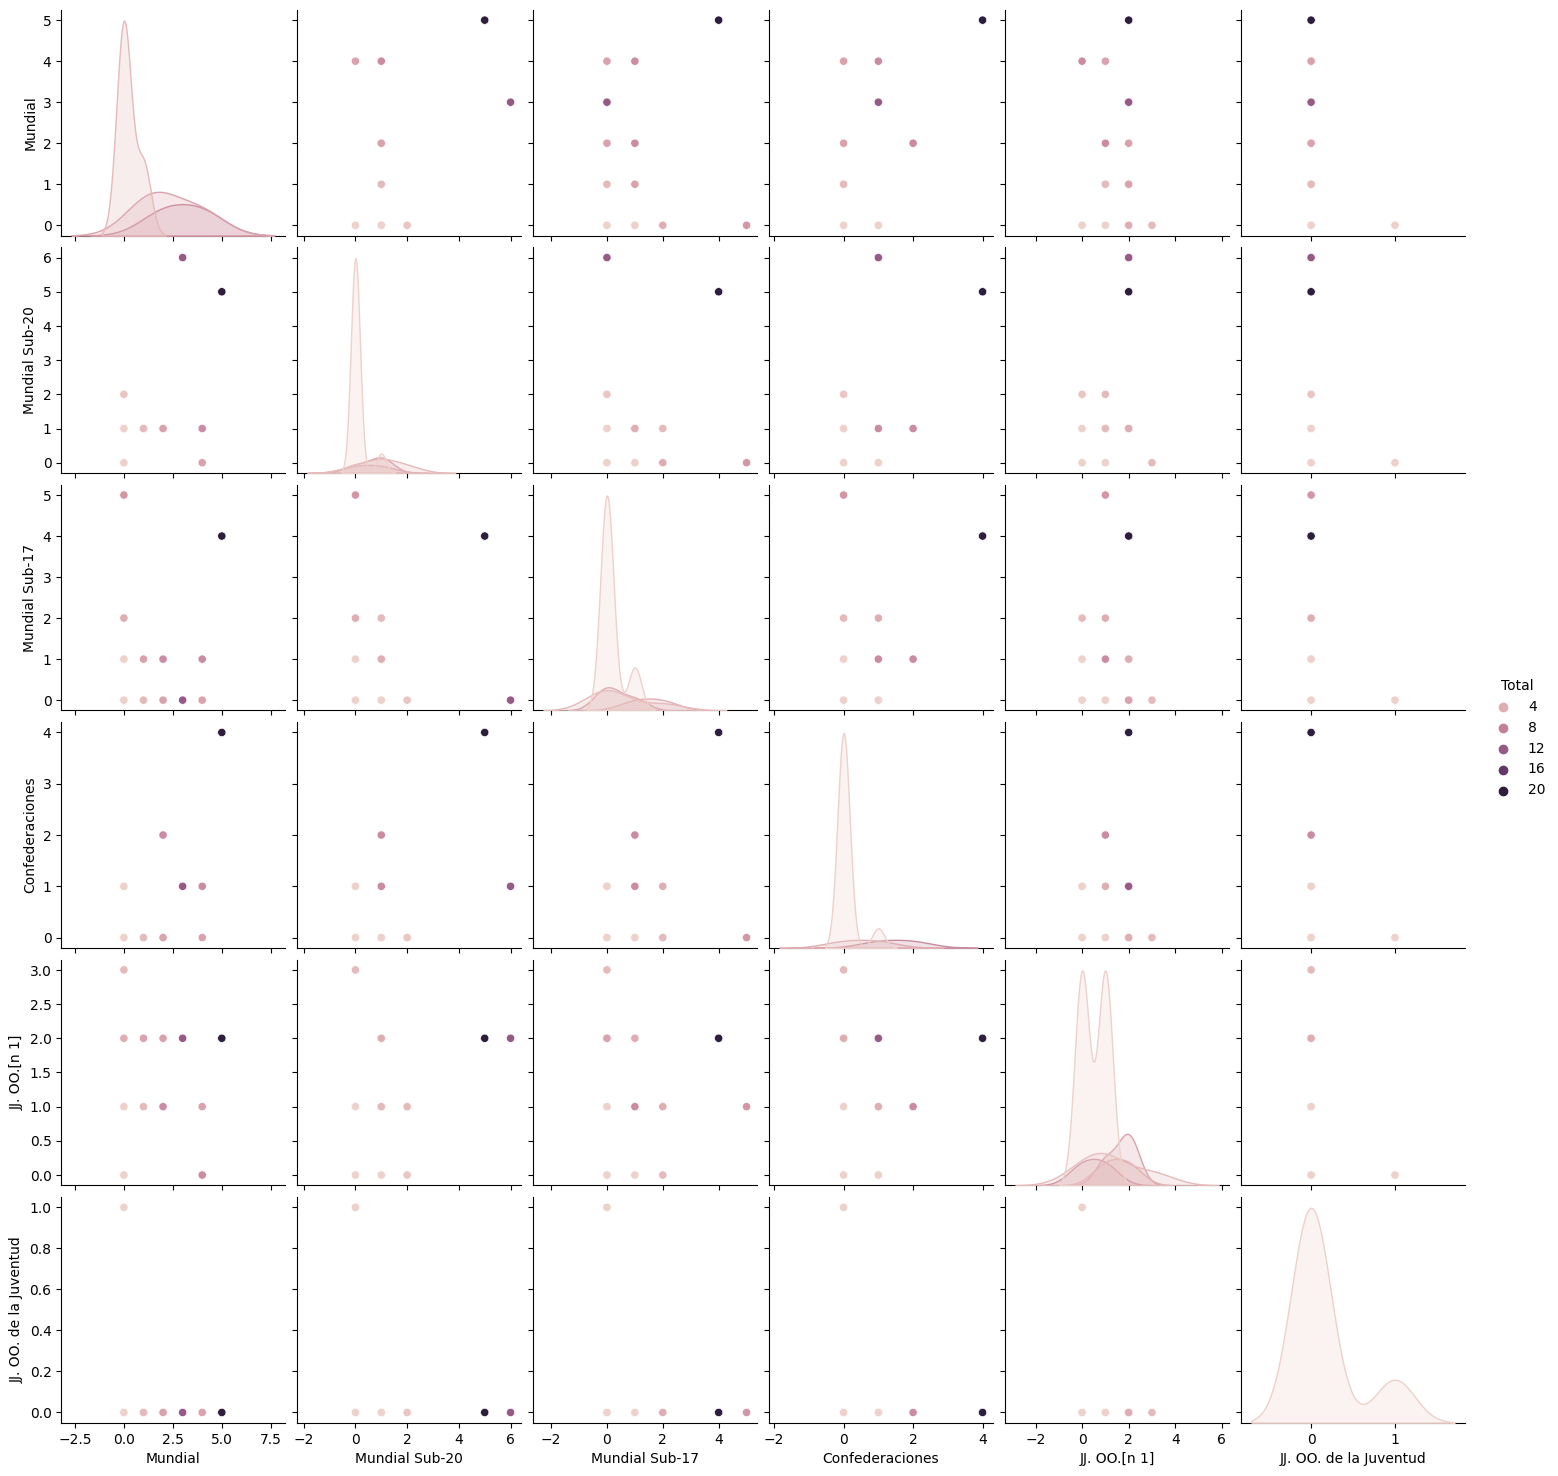

In [35]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Total")

In [39]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
sel_data = data[['Mundial','Confederaciones', 'JJ. OO.[n 1]', 'Total']]
sel_data

,Mundial,Confederaciones,JJ. OO.[n 1],Total
0,5,4,2,20
1,4,1,0,7
2,4,0,1,5
3,3,1,2,12
4,2,2,1,7
5,2,0,2,5
6,1,0,2,5
7,1,0,1,3
8,0,0,1,3
9,0,0,0,2


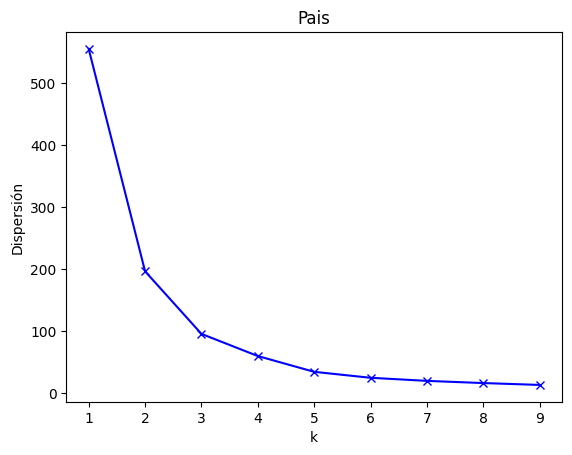

In [41]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Pais')